# Urine Analysis Data

#### DESCRIPTION

Urine specimen were analyzed in an effort to determine if certain physical characteristics of the urine might be related to the formation of calcium oxalate crystals.


This data frame contains the following columns:

**r** - Indicator of the presence of calcium oxalate crystals.

**gravity** - The specific gravity of the urine.

**ph** - The pH reading of the urine.

**osmo** - The osmolarity of the urine. Osmolarity is proportional to the concentration of molecules in solution.

**cond** - The conductivity of the urine. Conductivity is proportional to the concentration of charged ions in solution.

**urea** - The urea concentration in millimoles per litre.

**calc** - The calcium concentration in millimoles per litre.

#### Source
The data were obtained from Andrews, D.F. and Herzberg, A.M. (1985) Data: A Collection of Problems from Many Fields for the Student and Research Worker. Springer-Verlag.

#### References
Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press.

## Importing data and required Packages

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("urine.csv",index_col=0)

In [3]:
df.head(5)

,r,gravity,ph,osmo,cond,urea,calc
1,0,1.021,4.91,725.0,NaN,443,2.45
2,0,1.017,5.74,577.0,20.0,296,4.49
3,0,1.008,7.20,321.0,14.9,101,2.36
4,0,1.011,5.51,408.0,12.6,224,2.15
5,0,1.005,6.52,187.0,7.5,91,1.16


In [4]:
df.describe()

,r,gravity,ph,osmo,cond,urea,calc
count,474.000000,474.000000,474.000000,468.000000,468.000000,474.000000,474.000000
mean,0.430380,1.018114,6.028481,615.038462,20.901282,266.405063,4.138987
std,0.495652,0.007201,0.720469,236.968837,7.909388,130.558973,3.242775
min,0.000000,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000
25%,0.000000,1.012000,5.530000,410.000000,14.300000,159.000000,1.450000
50%,0.000000,1.018000,5.940000,612.500000,21.400000,260.000000,3.160000
75%,1.000000,1.024000,6.400000,803.000000,27.000000,380.000000,6.190000
max,1.000000,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000


## Cleaning Data 

In [5]:
# Let's see how to data looks like. Does it contains any NULL Values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 1 to 474
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   r        474 non-null    int64  
 1   gravity  474 non-null    float64
 2   ph       474 non-null    float64
 3   osmo     468 non-null    float64
 4   cond     468 non-null    float64
 5   urea     474 non-null    int64  
 6   calc     474 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 29.6 KB


In [6]:
df.isnull().sum()

r          0
gravity    0
ph         0
osmo       6
cond       6
urea       0
calc       0
dtype: int64

In [7]:
# Null Values can be replaced with mean of the entries in this dataset
osmo = df['osmo'].mean()
cond = df['cond'].mean()
df['osmo'] = df['osmo'].replace(np.nan, osmo)
df['cond'] = df['cond'].replace(np.nan, cond)
df.head()

,r,gravity,ph,osmo,cond,urea,calc
1,0,1.021,4.91,725.0,20.901282,443,2.45
2,0,1.017,5.74,577.0,20.000000,296,4.49
3,0,1.008,7.20,321.0,14.900000,101,2.36
4,0,1.011,5.51,408.0,12.600000,224,2.15
5,0,1.005,6.52,187.0,7.500000,91,1.16


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 1 to 474
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   r        474 non-null    int64  
 1   gravity  474 non-null    float64
 2   ph       474 non-null    float64
 3   osmo     474 non-null    float64
 4   cond     474 non-null    float64
 5   urea     474 non-null    int64  
 6   calc     474 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 29.6 KB


Note - There are many other ways to clean the data. Replacing Null values with mean values is one of them.

### Visualising data and spotting Trends

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
count = df['r'][df['r'] == 0].count()/df['r'].count()
count

0.569620253164557

In [10]:
count_urea = df['urea'][df['r']==0].count()
count_urea

270

#### Plotting Box Plots for Various Parameters

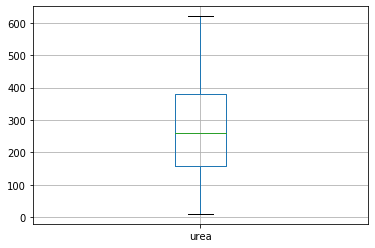

In [11]:
# PLot Box PLot for Urea concentration
df.boxplot(column = 'urea')

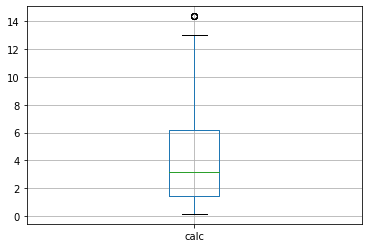

In [12]:
df.boxplot(column = 'calc')

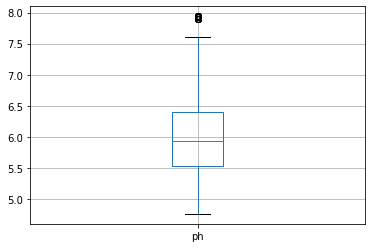

In [13]:
df.boxplot(column = 'ph')

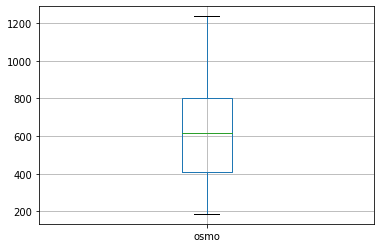

In [14]:
df.boxplot(column = 'osmo')

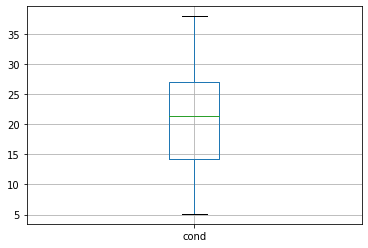

In [15]:
df.boxplot(column = 'cond')

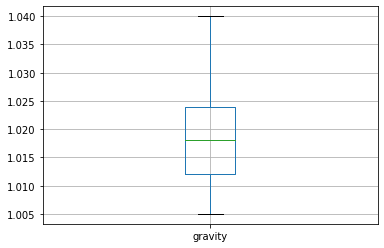

In [16]:
df.boxplot(column='gravity')

**Note-**
As we have seen a few outliers in some of the parameters, these outliers are still within range. For example- ph of 8 is an outlier to this dataset but this data can occur as ph is generally between 1-14.

**Note** - Calcium Concentration has a few outliers depending on the data but the outliers are still possible and thus cannot be discarded.

#### Plotting r vs all other parameters

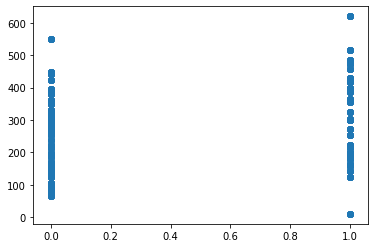

In [17]:
plt.scatter(df['r'],df['urea'])

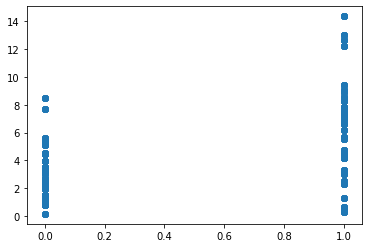

In [18]:
plt.scatter(df['r'],df['calc'])

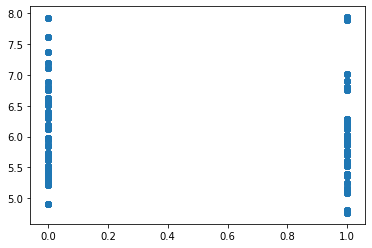

In [19]:
plt.scatter(df['r'],df['ph'])

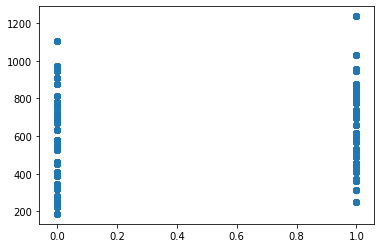

In [20]:
plt.scatter(df['r'],df['osmo'])

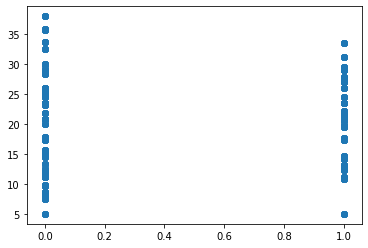

In [21]:
plt.scatter(df['r'],df['cond'])

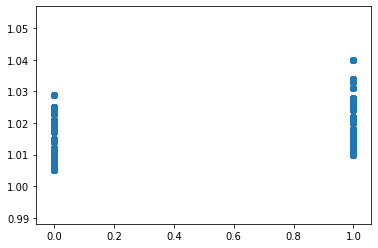

In [22]:
plt.scatter(df['r'],df['gravity'])

#### Plotting specific gravity of urea solution v/s other parameters

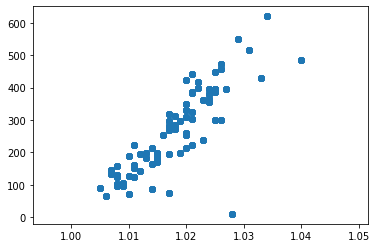

In [23]:
plt.scatter(df['gravity'],df['urea'])

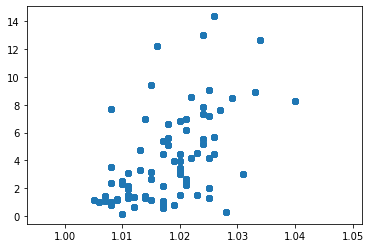

In [24]:
plt.scatter(df['gravity'],df['calc'])

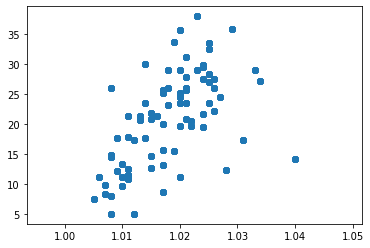

In [25]:
plt.scatter(df['gravity'],df['cond'])

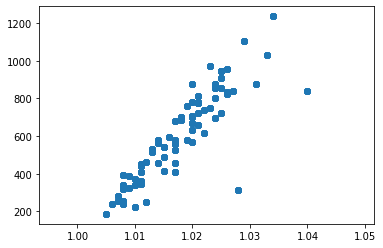

In [26]:
plt.scatter(df['gravity'],df['osmo'])

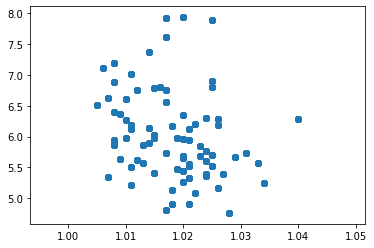

In [27]:
plt.scatter(df['gravity'],df['ph'])

**Findings-**
1. Specific gravity of urine is proportional to urea concentration.
2. Specific gravity of urine is proportional to osmolarity of the urine.

#### Plotting pH of urea solution v/s other parameters

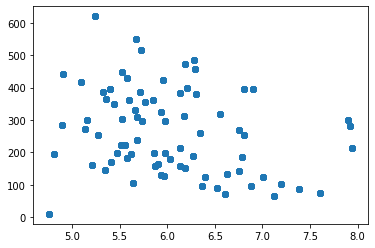

In [28]:
plt.scatter(df['ph'],df['urea'])

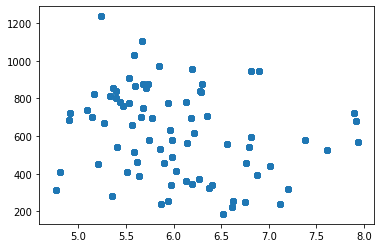

In [29]:
plt.scatter(df['ph'],df['osmo'])

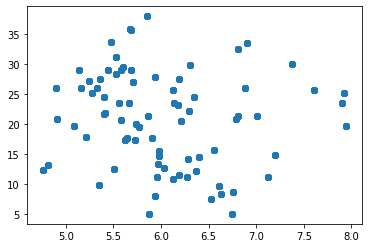

In [30]:
plt.scatter(df['ph'],df['cond'])

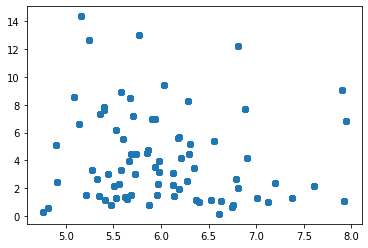

In [31]:
plt.scatter(df['ph'],df['calc'])

Note - No relation between ph and other parameters

#### Plotting osmolarity of urea solution v/s other parameters

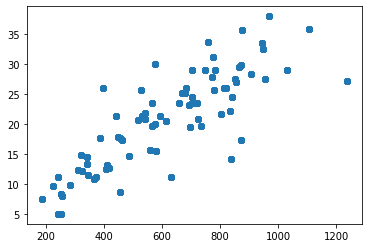

In [32]:
plt.scatter(df['osmo'],df['cond'])

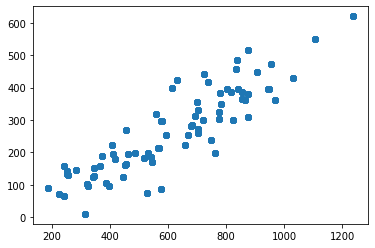

In [33]:
plt.scatter(df['osmo'],df['urea'])

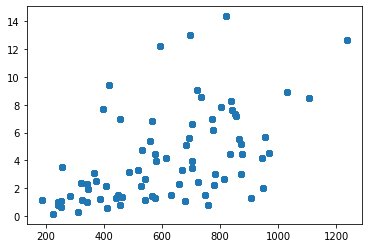

In [34]:
plt.scatter(df['osmo'],df['calc'])

**Findings-*** 
1. Osmolarity is directly proportional to Urea Concentration
2. Osmolarity is also linearly related to Conductivity

#### Plotting conductivity of urea solution v/s other parameters

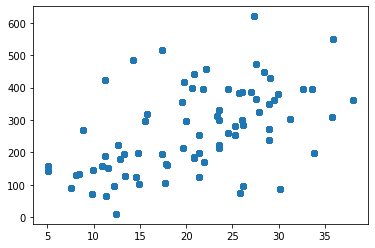

In [35]:
plt.scatter(df['cond'],df['urea'])

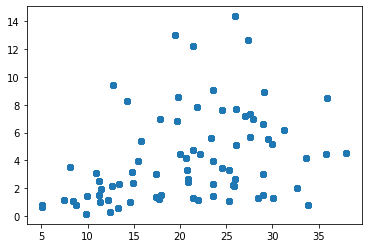

In [36]:
plt.scatter(df['cond'],df['calc'])

Note - No relation between conductivity and other reamining parameters

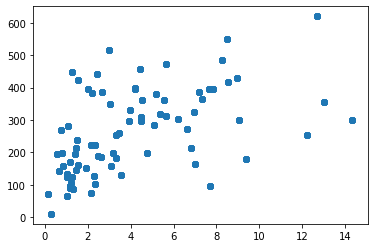

In [37]:
# relation between calcium concentration and urea content
plt.scatter(df['calc'],df['urea'])

No relation between calcium concentration and urea conteent observed

# Perceptron Model

In [38]:
df.groupby('r').mean()

,gravity,ph,osmo,cond,urea,calc
r,,,,,,
0,1.015489,6.098667,565.288889,20.557806,237.111111,2.624889
1,1.021588,5.935588,680.883484,21.355882,305.176471,6.142941


### Test and train data

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [40]:
X = df.drop(['r'], axis =1)

In [41]:
X

,gravity,ph,osmo,cond,urea,calc
1,1.021,4.91,725.0,20.901282,443,2.45
2,1.017,5.74,577.0,20.000000,296,4.49
3,1.008,7.20,321.0,14.900000,101,2.36
4,1.011,5.51,408.0,12.600000,224,2.15
5,1.005,6.52,187.0,7.500000,91,1.16
...,...,...,...,...,...,...
470,1.025,7.90,721.0,23.600000,301,9.04
471,1.017,4.81,410.0,13.300000,195,0.58
472,1.024,5.40,803.0,21.800000,394,7.82
473,1.016,6.81,594.0,21.400000,255,12.20


In [42]:
Y = df['r']

In [43]:
Y

1      0
2      0
3      0
4      0
5      0
      ..
470    1
471    1
472    1
473    1
474    1
Name: r, Length: 474, dtype: int64

In [44]:
X_train , X_test, Y_train, Y_test = train_test_split(X, Y , test_size = 0.1, stratify = Y, random_state = 1)      # Split ratio = 9:1

In [45]:
print(X_train.mean(),X_test.mean())

gravity      1.018190
ph           6.014390
osmo       616.188155
cond        20.835934
urea       268.556338
calc         4.196761
dtype: float64 gravity      1.017438
ph           6.153542
osmo       604.834936
cond        21.481250
urea       247.312500
calc         3.626250
dtype: float64


In [46]:
print(X_train.groupby(Y_train).mean())

    gravity        ph        osmo       cond        urea      calc
r                                                                 
0  1.015510  6.076008  567.551440  20.564229  240.086420  2.674198
1  1.021749  5.932568  680.771332  21.196721  306.360656  6.218525


In [47]:
print(Y_train.shape, Y_test.shape)

(426,) (48,)


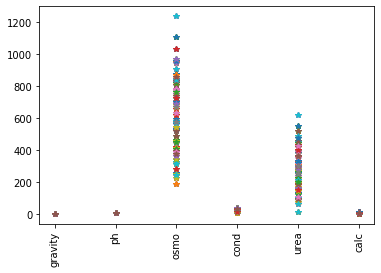

In [48]:
plt.plot(X_train.T, '*')
plt.xticks(rotation = 'vertical')
plt.show()

In [49]:
# Converting into numpy array 
X_train_mod = X_train.values
X_test_mod = X_test.values
Y_train_mod = Y_train.values
Y_test_mod = Y_test.values

In [50]:
X_train_mod.shape

(426, 6)

In [51]:
class Perceptron:
    def __init__ (self):
        self.w = None
        self.b = None
        
    def model(self, x):
        return 1 if (np.dot(self.w,x) >= self.b) else 0
    
    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)
    
    def fit(self, X, Y, epochs = 1, lr = 1):
        self.w = np.zeros(X.shape[1])
        self.b = 0
    
        accuracy = {}
        max_accuracy = 0
    
        wt_matrix = []
        
        for i in range(epochs):
            for x, y in zip(X, Y):
                y_pred = self.model(x)
                if y == 1 and y_pred == 0:
                    self.w = self.w + lr * x
                    self.b = self.b - lr * 1
                elif y == 0 and y_pred == 1:
                    self.w = self.w - lr * x
                    self.b = self.b + lr * 1
            wt_matrix.append(self.w)
            accuracy[i] = accuracy_score(self.predict(X), Y)
            if (accuracy[i] > max_accuracy):
                max_accuracy = accuracy[i]
                chkptw = self.w
                chkptb = self.b
        
        self.w = chkptw
        self.b = chkptb
        
        acc = list(accuracy.values())
        
        plt.plot(acc)
        plt.ylim([0, 1])
        plt.show()
        
        print(max_accuracy)
        
        return np.array(wt_matrix)

**Key** 
1. learning rate = lr.      
In machine learning and statistics, the learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.
2. chkptw and chktb are check pointers. Checkpointing is a mechanism to store the state of a computation so that it can be retrieved at a later point in time and continued.
3. epochs - An epoch is a term used in machine learning and indicates the number of passes through the entire training dataset the machine learning algorithm has completed.

In [52]:
perceptron = Perceptron()

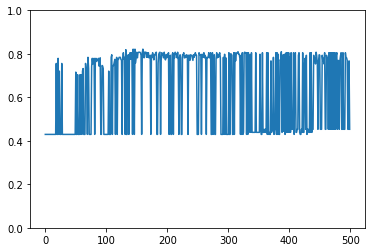

0.8215962441314554


In [53]:
wt_matrix = perceptron.fit(X_train_mod, Y_train_mod,500,0.1)

In [54]:
Y_pred_test = perceptron.predict(X_test_mod)
print(accuracy_score(Y_pred_test, Y_test_mod))

0.8333333333333334


In [55]:
print(wt_matrix)

[[-1.47070000e+00 -9.25800000e+00  4.62076923e+01 -1.89105128e+01
   5.59000000e+01  2.37600000e+01]
 [-3.14560000e+00 -2.04000000e+01  3.84115385e+01 -3.73710256e+01
   6.42000000e+01  4.68790000e+01]
 [-4.91670000e+00 -3.19690000e+01  3.68192308e+01 -5.86715385e+01
   7.01000000e+01  7.04650000e+01]
 ...
 [-1.84168500e+02 -1.36854800e+03  3.04692308e+02 -4.43959385e+03
  -2.55800000e+02  6.51792300e+03]
 [-1.84256400e+02 -1.36977200e+03  2.23803846e+02 -4.44622397e+03
  -2.95000000e+02  6.52406500e+03]
 [-1.84642400e+02 -1.37260500e+03  2.92615385e+02 -4.45046410e+03
  -2.21800000e+02  6.52951700e+03]]


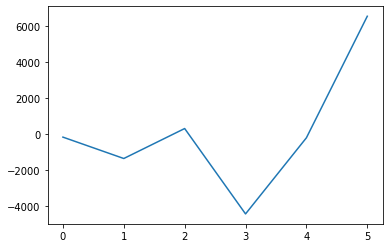

In [56]:
plt.plot(wt_matrix[-1,:])
plt.show()

# Findings

1. Learning rate for Perceptron Model is not necessary.
2. The model is approximately 83% accurate which is quite less when when compared to more advanced learning models. 
3. epochs and learning rate are hyperparameters that can be configured using advamce mathematics but here trial and error has been used. It is done so for learning purpose.